In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\14982\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


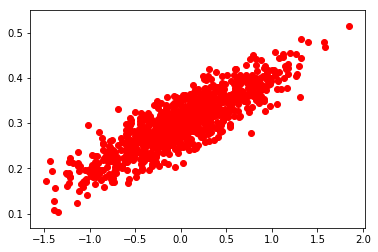

In [2]:
# 随机生成1000个点，围绕在y=0.1x+0.3的直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.scatter(x_data,y_data,c='r')
plt.show()

In [7]:
# 生成1维的W矩阵，取值是[-1,1]之间的随机数
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
# 生成1维的b矩阵，初始值是0
b = tf.Variable(tf.zeros([1]), name='b')
# 经过计算得出预估值y
y = W * x_data + b

# 以预估值y和实际值y_data之间的均方误差作为损失
loss = tf.reduce_mean(tf.square(y - y_data), name='loss')
# 采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)
# 训练的过程就是最小化这个误差值
train = optimizer.minimize(loss, name='train')

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

# 初始化的W和b是多少
print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
# 执行20次训练
for step in range(20):
    sess.run(train)
    # 输出训练好的W和b
    print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))


W = [0.61735725] b = [0.] loss = 0.16881964
W = [0.46534875] b = [0.2971851] loss = 0.04062884
W = [0.35679188] b = [0.2980725] loss = 0.020560868
W = [0.2804998] b = [0.2987062] loss = 0.010649149
W = [0.22688282] b = [0.29915157] loss = 0.0057536783
W = [0.1892016] b = [0.29946458] loss = 0.0033357705
W = [0.16271979] b = [0.29968455] loss = 0.0021415483
W = [0.14410876] b = [0.29983914] loss = 0.0015517139
W = [0.1310292] b = [0.2999478] loss = 0.0012603898
W = [0.12183708] b = [0.30002415] loss = 0.0011165029
W = [0.11537699] b = [0.3000778] loss = 0.001045436
W = [0.11083694] b = [0.30011553] loss = 0.0010103359
W = [0.10764626] b = [0.30014202] loss = 0.0009929994
W = [0.10540389] b = [0.30016065] loss = 0.0009844371
W = [0.10382799] b = [0.30017373] loss = 0.000980208
W = [0.10272047] b = [0.30018294] loss = 0.0009781191
W = [0.10194212] b = [0.3001894] loss = 0.0009770873
W = [0.10139511] b = [0.30019394] loss = 0.0009765779
W = [0.10101067] b = [0.30019715] loss = 0.0009763263

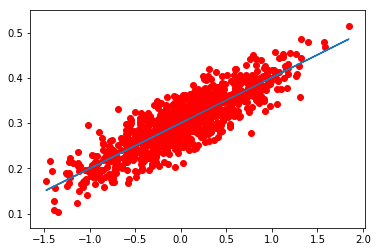

In [8]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
plt.show()